In [45]:
import numpy as np
import pandas as pd
from pathlib import Path
import torch
from torch import nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn import datasets, ensemble
from sklearn.inspection import permutation_importance
import os
import glob
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors
from sklearn import datasets, linear_model, metrics

from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV, LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score
from sklearn.model_selection import train_test_split
pd.set_option('display.max_colwidth', None)

np.random.seed(0)

In [46]:
data_dir = Path("../../../Datasets/Arduino_dataset/") 

In [47]:
# Params
params = {'n_estimators': 500,
          'max_depth': 4,
          'min_samples_split': 5,
          'learning_rate': 0.1,
          'loss': 'ls'}

In [48]:
def convert(df: pd.DataFrame, frame_size=10):
    x = np.asarray(df.iloc[:, 1]).reshape(-1, frame_size)
#     x = x[x.shape[0]//10:-x.shape[0]//10]
    return x


def change(df4: pd.DataFrame):
    for index, row in df4.iterrows():
        if row['frequency'] != "airflow(m/s)":
            if float(row['frequency']) > 500:
                df4.drop(index, inplace=True)
    return df4

In [49]:

df29 = pd.read_csv(data_dir / "different_distances/Vent1_2_5m.txt", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df29 = df29[df29['frequency'] != "clocktime"]
df29 = df29.dropna()
df29 = change(df29)
df29 = convert(df29)

df30 = pd.read_csv(data_dir / "no_air/noair.txt", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df30 = df30[df30['frequency'] != "clocktime"]
df30 = df30.dropna()
df30 = change(df30)
df30 = convert(df30)

df31 = pd.read_csv(data_dir / "different_distances/Vent1_on_vent.txt", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df31 = df31[df31['frequency'] != "clocktime"]
df31 = df31.dropna()
df31 = change(df31)
df31 = convert(df31)

In [50]:


df32 = pd.read_csv(data_dir / "different_distances/vent1_1m.txt", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df32 = df32[df32['frequency'] != "clocktime"]
df32 = df32.dropna()
df32 = change(df32)
df32 = convert(df32)


df34 = pd.read_csv(data_dir / "different_distances/vent1_50cm.txt", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df34 = df34[df34['frequency'] != "clocktime"]
df34 = df34.dropna()
df34 = change(df34)
df34 = convert(df34)


df35 = pd.read_csv(data_dir / "different_distances/vent1_150cm.txt", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df35 = df35[df35['frequency'] != "clocktime"]
df35 = df35.dropna()
df35 = change(df35)
df35 = convert(df35)

df42 = pd.read_csv(data_dir / "different_distances/vent1_2m.txt", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df42 = df42[df42['frequency'] != "clocktime"]
df42 = df42.dropna()
df42 = convert(df42)





In [51]:

df43 = pd.read_csv(data_dir / "different_vents/vent2_1.txt", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df43 = df43[df43['frequency'] != "clocktime"]
df43 = df43.dropna()
df43 = convert(df43)
df43 = df43[:-10]
# dftest21 = df42[-50:]
# df42 = df42[:-50]


df44 = pd.read_csv(data_dir / "different_vents/side_vent_1.txt", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df44 = df44[df44['frequency'] != "clocktime"]
df44 = df44.dropna()
df44 = convert(df44)
df44 = df44[:-10]
# dftests1 = df44[-50:]
# df44 = df44[:-50]



df45 = pd.read_csv(data_dir / "different_vents/homevent.txt", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df45 = df45[df45['frequency'] != "clocktime"]
df45 = df45.dropna()
df45 = convert(df45)
df45 = df45[:-10]
# dftesth1 = df45[-50:]
# df45 = df45[:-50]


# df46 = pd.read_csv(data_dir9 / "fan_high.txt", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
# df46 = df46[df46['frequency'] != "clocktime"]
# df46 = df46.dropna()
# df46 = convert(df46)
# df46 = df46[:-10]
# dftestf1 = df46[-50:]
# df46 = df46[:-50]



In [52]:

df = np.concatenate([df29, df31, df32, df35, df42])

In [53]:
data = df


In [54]:
X = data[:,:-1]

X = X[:, :7]


In [55]:
y = data[:, -1]



In [56]:
print(max(y), min(y))
for i in range(len(y)):
    if i >= len(y):
        break
    if y[i]>35 or y[i]<1:
        print (i, y[i])
        X = np.delete(X, i, axis = 0)
        y = np.delete(y, i)
        

32.9 2.17


In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [58]:
reg = ensemble.GradientBoostingRegressor(**params)
reg.fit(X_train, y_train)


GradientBoostingRegressor(max_depth=4, min_samples_split=5, n_estimators=500)

In [59]:
from joblib import dump, load
dump(reg, "flowSense_regression.joblib")

['flowSense_regression.joblib']

In [60]:
y_pred = reg.predict(X_test)
y_train_pred = reg.predict(X_train)

In [61]:
print(y_pred[:5])
print(y_test[:5])

[3.46433075 3.5817273  3.7501707  3.55495544 3.71086506]
[3.9  3.01 3.82 3.82 3.98]


In [62]:
print(y_train_pred[:5])
print(y_train[:5])

[ 3.41039008 29.04734924  3.7060822   3.13428194  3.35040146]
[ 3.59 29.09  3.82  3.01  3.44]


In [63]:
print("MSE of test: ", mean_squared_error(y_test, y_pred))
print(y_pred.shape)

print("Test Reg score: ", reg.score(X_test, y_test))
    

MSE of test:  4.809147303558632
(516,)
Test Reg score:  0.9158238167954162


In [64]:
print("MSE of training: ",  mean_squared_error(y_train, y_train_pred))

print("Train Reg score: ", reg.score(X_train, y_train))

MSE of training:  0.07274052719145747
Train Reg score:  0.998823723613507


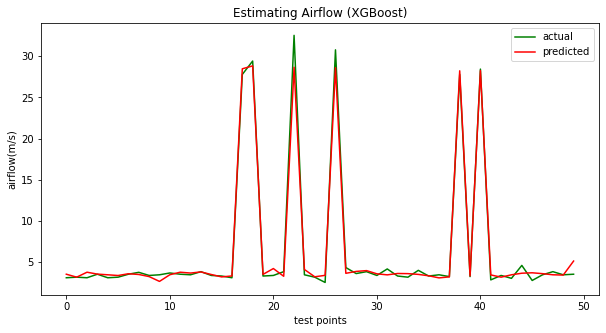

In [65]:
plt.figure(figsize=(10,5))
plt.plot(y_test[50:100], 'g', label="actual")
plt.plot(y_pred[50:100], 'r', label="predicted")
plt.legend()
plt.xlabel("test points")
plt.ylabel("airflow(m/s)")
plt.title("Estimating Airflow (XGBoost)")
plt.savefig("final.png")

Text(0.5, 1.0, 'Estimating Airflow (XGBoost)')

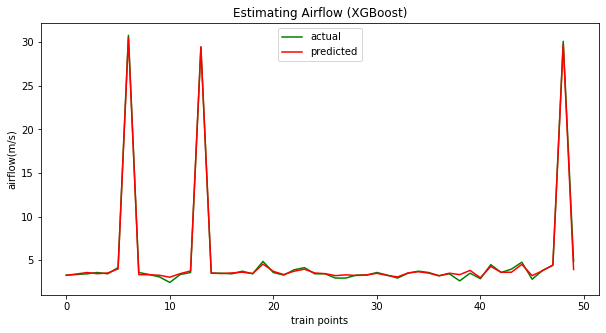

In [66]:
plt.figure(figsize=(10,5))
plt.plot(y_train[50:100], 'g', label="actual")
plt.plot(y_train_pred[50:100], 'r', label="predicted")
plt.legend()
plt.xlabel("train points")
plt.ylabel("airflow(m/s)")
plt.title("Estimating Airflow (XGBoost)")
# plt.savefig("1m_v1.jpg")

